Liam Campbell - May 2017

# Wine Quality Regression Analysis
* In this notebook I will use historical wine quality data to train, validate, and test four different regression models 

## Load Data

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sb

# Load data into dataframe
url = 'http://ieor.berkeley.edu/~ieor165/homeworks/winequality-red.csv'
data = pd.read_csv(url, sep=";")

# Store data locally in case url dies
data.to_csv('winequality-red.csv')

# Shuffle the order of data points (by row)
data = data.reindex(np.random.permutation(data.index))

# Separate predictors and outcomes
x = data.drop("quality", axis=1)
y = data.quality

data.shape

(1599, 12)

## Data Preprocessing

In [3]:
# Split data into training and testing sets
x_train = x[:1200]
x_test = x[1200:]
y_train = y[:1200]
y_test = y[1200:]

# Create a scaler for standardization of data and standardize predictor data
# ONLY FOR USE IF NECESSARY, WILL NOT USE TO TRAIN AND TEST
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
414,8.8,0.520,0.34,2.70,0.087,24.0,122.0,0.99820,3.26,0.61,9.500000,5
1598,6.0,0.310,0.47,3.60,0.067,18.0,42.0,0.99549,3.39,0.66,11.000000,6
1128,10.0,0.430,0.33,2.70,0.095,28.0,89.0,0.99840,3.22,0.68,10.000000,5
29,7.8,0.645,0.00,2.00,0.082,8.0,16.0,0.99640,3.38,0.59,9.800000,6
1552,6.3,0.680,0.01,3.70,0.103,32.0,54.0,0.99586,3.51,0.66,11.300000,6
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.800000,4
301,11.1,0.180,0.48,1.50,0.068,7.0,15.0,0.99730,3.22,0.64,10.100000,6
92,8.6,0.490,0.29,2.00,0.110,19.0,133.0,0.99720,2.93,1.98,9.800000,5
888,6.8,0.570,0.00,2.50,0.072,32.0,64.0,0.99491,3.43,0.56,11.200000,6
257,6.6,0.695,0.00,2.10,0.075,12.0,56.0,0.99680,3.49,0.67,9.200000,5


## OLS REGRESSION

In [4]:
# Create ols regression
ols = linear_model.LinearRegression()
ols.fit(x_train, y_train)

# Test model
ols_pred = ols.predict(x_test)

In [6]:
# Extract Model Data

ols_r2 = metrics.r2_score(y_test, ols_pred)
ols_mse = metrics.mean_squared_error(y_test, ols_pred)
ols_crossval = cross_val_score(ols, x_train, y_train, cv=10)


print 'R-Squared Score: ', ols_r2
print 'MSE Score: ', ols_mse
print 'Min Cross-Validation Score: ', ols_crossval.mean()

features = data.columns.tolist()
ols_coef = ols.coef_.tolist()
features.pop()
ols_params = pd.DataFrame()
ols_params['Features'] = pd.Series(features)
ols_params['Coefficients'] = pd.Series(ols_coef)

print('')

print 'Intercept: ', ols.intercept_
print 'Coefficients: ' 
print ols_params

R-Squared Score:  0.326980731869
MSE Score:  0.437950164266
Min Cross-Validation Score:  0.345926300272

Intercept:  11.2074980411
Coefficients: 
                Features  Coefficients
0          fixed acidity      0.016980
1       volatile acidity     -1.217672
2            citric acid     -0.189636
3         residual sugar     -0.002041
4              chlorides     -1.636035
5    free sulfur dioxide      0.003688
6   total sulfur dioxide     -0.003418
7                density     -6.826233
8                     pH     -0.443775
9              sulphates      0.735359
10               alcohol      0.289806


# Ridge Regression

In [7]:
# Create hyperparameter values to be tested
alpha_ridge = np.logspace(-3, 2, 200)

# Perform cross-validation
ridge_tune = linear_model.RidgeCV(alphas=alpha_ridge, fit_intercept=True, store_cv_values=True)
ridge_tune.fit(x_train, y_train)

# Gather cross-validation data
ridge_cv = pd.DataFrame(ridge_tune.cv_values_)
for i in ridge_cv.columns:
    ridge_cv[i] = ridge_cv[i].mean()
ridge_cv = ridge_cv.iloc[[0]]
ridge_cv = ridge_cv.iloc[0].tolist()

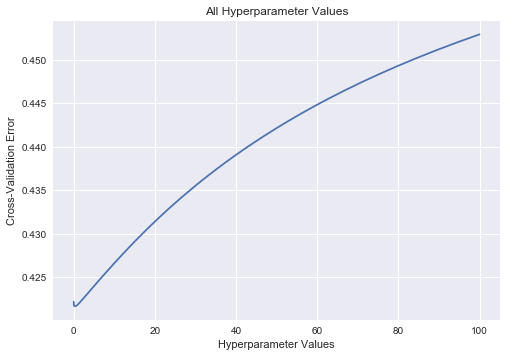

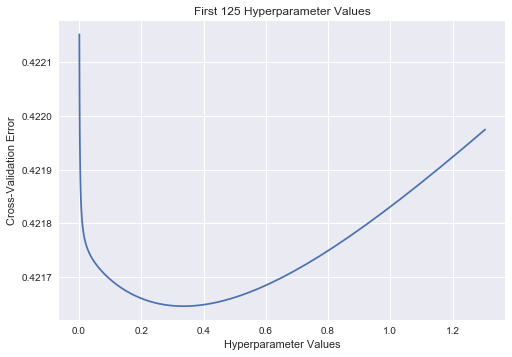

In [8]:
# Plot cross-validation error against hyperparameter values
plt.plot(alpha_ridge, ridge_cv)
plt.xlabel('Hyperparameter Values')
plt.ylabel('Cross-Validation Error')
plt.title('All Hyperparameter Values')
plt.show()

plt.plot(alpha_ridge[:125], ridge_cv[:125])
plt.xlabel('Hyperparameter Values')
plt.ylabel('Cross-Validation Error')
plt.title('First 125 Hyperparameter Values')
plt.show()

In [13]:
# Create ridge regression with identified hyperparameter
ridge = linear_model.Ridge(alpha=ridge_tune.alpha_, fit_intercept=True)
ridge.fit(x_train, y_train)

# Test model
ridge_pred = ridge.predict(x_test)

In [14]:
# Extract model data
ridge_r2 = metrics.r2_score(y_test, ridge_pred)
ridge_mse = metrics.mean_squared_error(y_test, ridge_pred)

print 'R-Squared Score: ', ridge_r2
print 'MSE Score: ', ridge_mse
print 'Min Cross-Validation Score: ', min(ridge_cv)

ridge_coef = ridge.coef_.tolist()
features.pop()
ridge_params = pd.DataFrame()
ridge_params['Features'] = pd.Series(features)
ridge_params['Coefficients'] = pd.Series(ridge_coef)

print ''

print 'Hyperparamater (alpha) = ', ridge_tune.alpha_
print 'Intercept: ', ridge.intercept_
print 'Coefficients: '
print ridge_params

R-Squared Score:  0.325145117978
MSE Score:  0.439144643299
Min Cross-Validation Score:  0.421645956594

Hyperparamater (alpha) =  0.344896226041
Intercept:  4.40090838634
Coefficients: 
               Features  Coefficients
0         fixed acidity      0.012844
1      volatile acidity     -1.225283
2           citric acid     -0.197752
3        residual sugar     -0.005331
4             chlorides     -1.388043
5   free sulfur dioxide      0.003733
6  total sulfur dioxide     -0.003394
7               density     -0.018392
8                    pH     -0.449526


# Lasso Regression

In [15]:
# Create hyperparameter values to be tested
alpha_lasso = np.logspace(-5, 2, 200)

# Perform cross-validation
lasso_tune = linear_model.LassoCV(alphas=alpha_lasso, fit_intercept=True, cv=200)
lasso_tune.fit(x_train, y_train)

# Gather cross-validation data
lasso_cv = pd.DataFrame(lasso_tune.mse_path_)
for i in lasso_cv.columns:
    lasso_cv[i] = lasso_cv[i].mean()
lasso_cv = lasso_cv.iloc[[0]]
lasso_cv = lasso_cv.iloc[0].tolist()

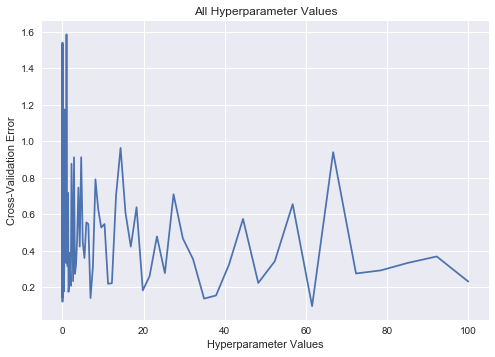

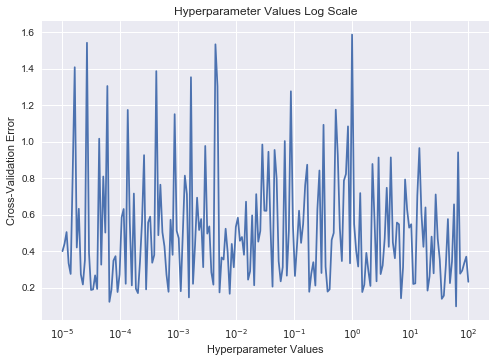

In [16]:
# Plot cross-validation error against hyperparameter values
plt.plot(alpha_lasso, lasso_cv)
plt.xlabel('Hyperparameter Values')
plt.ylabel('Cross-Validation Error')
plt.title('All Hyperparameter Values')
plt.show()

plt.plot(alpha_lasso, lasso_cv)
plt.xlabel('Hyperparameter Values')
plt.ylabel('Cross-Validation Error')
plt.title('Hyperparameter Values Log Scale')
plt.xscale('log')
plt.show()

In [17]:
# Create lasso regression with identified hyperparameter
lasso = linear_model.Lasso(alpha=lasso_tune.alpha_, fit_intercept=True)
lasso.fit(x_train, y_train)

# Test model
lasso_pred = lasso.predict(x_test)

In [18]:
# Extract model data
lasso_r2 = metrics.r2_score(y_test, lasso_pred)
lasso_mse = metrics.mean_squared_error(y_test, lasso_pred)

print 'R-Squared Score: ', lasso_r2
print 'MSE Score: ', lasso_mse
print 'Min Cross-Validation Score: ', min(lasso_cv)

lasso_coef = lasso.coef_.tolist()
features.pop()
lasso_params = pd.DataFrame()
lasso_params['Features'] = pd.Series(features)
lasso_params['Coefficients'] = pd.Series(lasso_coef)

print ''

print 'Hyperparamater (alpha) = ', lasso_tune.alpha_
print 'Intercept: ', lasso.intercept_
print 'Coefficients: '
print lasso_params

R-Squared Score:  0.326306684143
MSE Score:  0.438388783673
Min Cross-Validation Score:  0.0976425640402

Hyperparamater (alpha) =  2.24780583355e-05
Intercept:  4.50821791068
Coefficients: 
               Features  Coefficients
0         fixed acidity      0.010640
1      volatile acidity     -1.222946
2           citric acid     -0.189225
3        residual sugar     -0.004900
4             chlorides     -1.631555
5   free sulfur dioxide      0.003747
6  total sulfur dioxide     -0.003434
7               density     -0.000000


# Elastic Net

In [19]:
# Create Hyperperameter values and ratios to be tested
alpha_elastic = np.logspace(-5, 2, 100)
l1_ratios = np.logspace(0, -3, 100)

# Perform cross-validation
elastic_tune = linear_model.ElasticNetCV(l1_ratio=l1_ratios, alphas=alpha_elastic, fit_intercept=True, cv = 100)
elastic_tune.fit(x_train, y_train)

ElasticNetCV(alphas=array([  1.00000e-05,   1.17681e-05, ...,   8.49753e+01,   1.00000e+02]),
       copy_X=True, cv=100, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 1.     ,  0.9326 , ...,  0.00107,  0.001  ]),
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [20]:
# Gather cross-validation data
a = elastic_tune.mse_path_
for i in range(0, 100):
    for j in range(0, 100):
        a[i][j] = np.mean(a[i][j][0])
        b = a[:][:][0]
c = np.transpose(b)

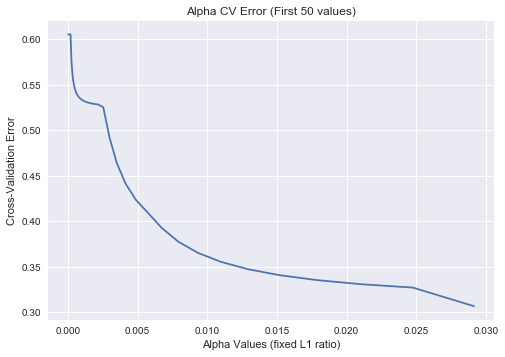

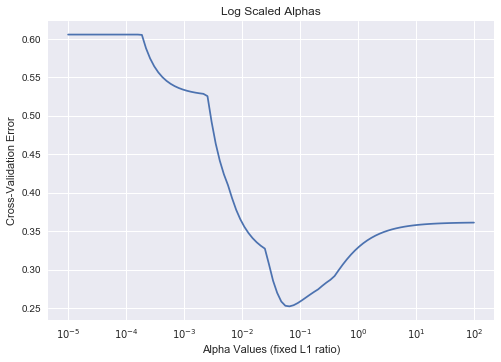

In [21]:
# Plot cross-validation error against hyperparameter values
plt.plot(alpha_elastic[:50], c[99][:50])
plt.xlabel('Alpha Values (fixed L1 ratio)')
plt.ylabel('Cross-Validation Error')
plt.title('Alpha CV Error (First 50 values)')
plt.show()
# Plot cross-validation error against hyperparameter values
plt.plot(alpha_elastic, c[99])
plt.xlabel('Alpha Values (fixed L1 ratio)')
plt.ylabel('Cross-Validation Error')
plt.title('Log Scaled Alphas')
plt.xscale('log')
plt.show()

In [22]:
# Create elastic regression with identified hyperparameters
elastic = linear_model.ElasticNet(alpha=elastic_tune.alpha_, l1_ratio=elastic_tune.l1_ratio_, fit_intercept=True)
elastic.fit(x_train, y_train)

# Test model
elastic_pred = elastic.predict(x_test)

In [23]:
# Extract model data
elastic_r2 = metrics.r2_score(y_test, elastic_pred)
elastic_mse = metrics.mean_squared_error(y_test, elastic_pred)

print 'R-Squared Score: ', elastic_r2
print 'MSE Score: ', elastic_mse
print 'Min Cross-Validation Score: ', np.min(b)

elastic_coef = elastic.coef_.tolist()
features.pop()
elastic_params = pd.DataFrame()
lasso_params['Features'] = pd.Series(features)
elastic_params['Coefficients'] = pd.Series(elastic_coef)

print ''

print 'Hyperparamater (alpha) = ', elastic_tune.alpha_
print 'L1 Ratio = ', elastic_tune.l1_ratio_
print 'Intercept: ', elastic.intercept_
print 'Coefficients: '
print elastic_params

R-Squared Score:  0.325257264334
MSE Score:  0.439071666912
Min Cross-Validation Score:  0.252248287297

Hyperparamater (alpha) =  0.00025950242114
L1 Ratio =  0.001
Intercept:  4.4131513509
Coefficients: 
    Coefficients
0       0.012661
1      -1.225413
2      -0.197404
3      -0.005289
4      -1.409433
5       0.003733
6      -0.003398
7      -0.018933
8      -0.451897
9       0.695313
10      0.298556


* Through a cross-validation analysis using an elastic net regression, it is apparent that the data is much better suited for a **ridge regression** rather than a lasso regression. This is seen in that the identified optimal L1 ratio is very close to zero and that the coefficients of the elastic and ridge models are very similar. 